# Inverse Transform Sampling
## Peter Wills, 6/8/2018

We'll use [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to sample from an arbitrary probability density. We won't require that this density is normalized; 

Make sure we can numerically integrate, so that we can build a CDF from the provided PDF (as well as normalize the PDF):

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def pdf(x):
    """A unit normal density, NOT normalized"""
    return np.exp(-x**2/2)

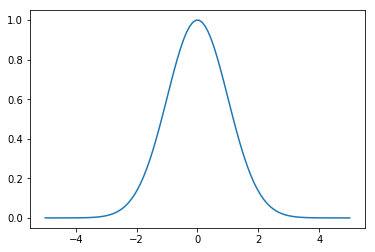

In [3]:
x = np.linspace(-5,5,100)
plt.plot(x,pdf(x));

So we've got ourselves a PDF, albeit without a normalization factor. Now let's use `sample` to draw samples from this distribution.

In [4]:
import sys; sys.path.append('/Users/peterwills/google-drive/python/my_packages/itsample/')
from itsample import sample

In [5]:
%%timeit
samples = sample(pdf,1)

2.47 ms ± 81.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%time
samples = sample(pdf,5000)

CPU times: user 11.8 s, sys: 160 ms, total: 11.9 s
Wall time: 12.1 s


In [7]:
from itsample import normalize
pdf_norm = normalize(pdf, vectorize=True)

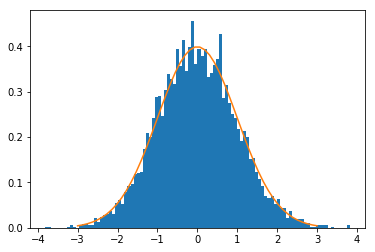

In [8]:
plt.hist(samples,bins=100,density=True);
x = np.linspace(-3,3)
plt.plot(x,pdf_norm(x))

Note that, for efficiency reasons, Let's compare this the built-in numpy sampler:

In [9]:
%%time
samples = plt.np.random.normal(size=[5000])

CPU times: user 588 µs, sys: 868 µs, total: 1.46 ms
Wall time: 2.19 ms


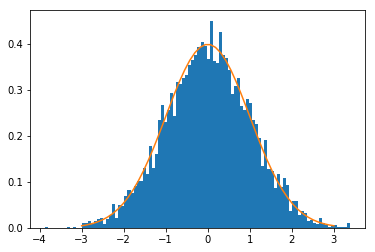

In [10]:
plt.hist(samples,bins=100,density=True);
plt.plot(x,pdf_norm(x))

Much slower, but comparable results. Suppose we wanted a normal against a a background:

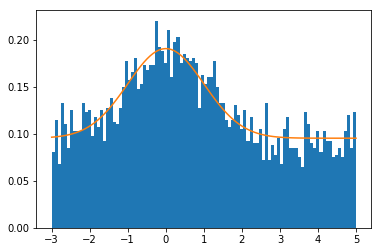

In [11]:
def pdf(x):
    """A unit normal density, NOT normalized"""
    return 1 + np.exp(-x**2/2)

lower_bd = -3
upper_bd = 5
guess = 1

samples = sample(pdf,5000,lower_bd=lower_bd,upper_bd=upper_bd, guess=guess)
pdf_norm = normalize(pdf,lower_bd=lower_bd,upper_bd=upper_bd,vectorize=True)

x = np.linspace(lower_bd,upper_bd,100)
plt.hist(samples,bins=100,density=True);
plt.plot(x,pdf_norm(x))

An exception will be raised if the PDF cannot be normalized:

In [12]:
def pdf(x):
    """A unit normal density, NOT normalized"""
    return 1 + np.exp(-x**2/2)

sample(pdf,1)

ValueError: PDF integral likely divergent.